In [1]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip /content/drive/MyDrive/minor2/melspectrograms.zip

Streaming output truncated to the last 5000 lines.
  inflating: melspectrograms/test/sick/audioset_QjnnMfe4wsc_30_35.png  
  inflating: melspectrograms/test/sick/audioset_St57xA4ML_o_320_325.png  
  inflating: melspectrograms/test/sick/audioset_-vu4jJkffMw_85_90.png  
  inflating: melspectrograms/test/sick/audioset_czpeupUmKZM_25_30.png  
  inflating: melspectrograms/test/sick/audioset_AkJU3bhu5WU_5_10.png  
  inflating: melspectrograms/test/sick/audioset_kL_-XdzJQ3g_5_10.png  
  inflating: melspectrograms/test/sick/audioset_NN-Mr5F-qo4_5_10.png  
  inflating: melspectrograms/test/sick/audioset_UPNlRqqgQvY_0_5.png  
  inflating: melspectrograms/test/sick/audioset_is7iUfqD5FE_115_120.png  
  inflating: melspectrograms/test/sick/audioset_MbFd1mxYqf0_55_60.png  
  inflating: melspectrograms/test/sick/audioset_mJ6ZO3xEcgw_50_55.png  
  inflating: melspectrograms/test/sick/audioset_3069HAJZkHo_35_40.png  
  inflating: melspectrograms/test/sick/audioset_mRL_XP9LecA_0_5.png  
  inflating: mel

In [ ]:
TRAIN_PATH = "melspectrograms/train"
VAL_PATH = "melspectrograms/validation"

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    "melspectrograms/train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 3716 images belonging to 2 classes.


In [ ]:
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator.class_indices

{'not_sick': 0, 'sick': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    "melspectrograms/validation",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 1219 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2)

Epoch 1/10
117/117 [==============================] - 100s 562ms/step - loss: 0.7096 - accuracy: 0.5898 - val_loss: 0.6235 - val_accuracy: 0.6250
Epoch 2/10
117/117 [==============================] - 66s 560ms/step - loss: 0.5971 - accuracy: 0.6656 - val_loss: 0.6120 - val_accuracy: 0.7188
Epoch 3/10
117/117 [==============================] - 66s 559ms/step - loss: 0.5743 - accuracy: 0.7025 - val_loss: 0.5595 - val_accuracy: 0.6719
Epoch 4/10
117/117 [==============================] - 65s 558ms/step - loss: 0.5514 - accuracy: 0.7111 - val_loss: 0.5223 - val_accuracy: 0.8125
Epoch 5/10
117/117 [==============================] - 65s 559ms/step - loss: 0.5384 - accuracy: 0.7227 - val_loss: 0.5241 - val_accuracy: 0.7500
Epoch 6/10
117/117 [==============================] - 65s 557ms/step - loss: 0.5376 - accuracy: 0.7175 - val_loss: 0.5670 - val_accuracy: 0.7656
Epoch 7/10
117/117 [==============================] - 65s 555ms/step - loss: 0.5186 - accuracy: 0.7303 - val_loss: 0.4770 - val_a

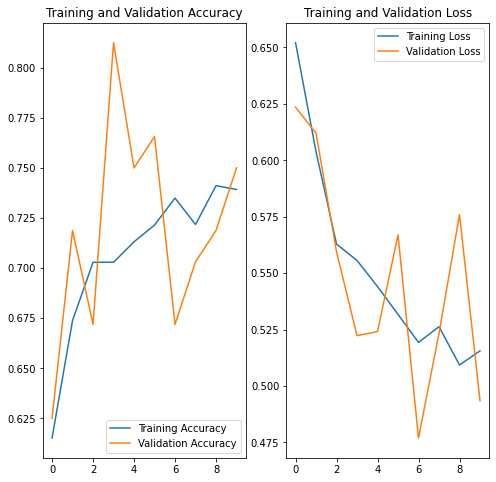

In [ ]:
 #analysis
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']
EPOCHS = 10
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
